In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("corona_virus.csv",
                 encoding="latin-1")
df.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"10,66,27,427",NaN,"11,59,824",NaN,"10,45,49,551",NaN,"9,18,052","1,368","3,18,476","3,464","1,17,68,34,935","35,14,983","33,48,05,269"
1,India,"4,49,39,515",NaN,"5,31,508",NaN,"4,43,56,693",NaN,"51,314",NaN,"31,948",378,"92,64,96,579","6,58,663","1,40,66,31,776"
2,France,"3,99,80,570",NaN,"1,66,556",NaN,"3,96,77,000",NaN,"1,37,014",869,"6,09,604","2,540","27,14,90,188","41,39,547","6,55,84,518"
3,Germany,"3,84,03,667",NaN,"1,73,044",NaN,"3,81,92,900",600,"37,723",NaN,"4,57,821","2,063","12,23,32,384","14,58,359","8,38,83,596"
4,Brazil,"3,74,49,418",NaN,"7,01,494",NaN,"3,62,49,161",NaN,"4,98,763",NaN,"1,73,897","3,257","6,37,76,166","2,96,146","21,53,53,593"


In [4]:
df.shape

(232, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     232 non-null    object 
 1   Total Cases       232 non-null    object 
 2   New Cases         5 non-null      object 
 3   Total Deaths      226 non-null    object 
 4   New Deaths        2 non-null      float64
 5   Total Recovered   211 non-null    object 
 6   New Recovered     12 non-null     object 
 7   Active Cases      213 non-null    object 
 8   Serious,Critical  127 non-null    object 
 9   Tot Cases/1M pop  230 non-null    object 
 10  Deaths/1M pop     224 non-null    object 
 11  Total Tests       213 non-null    object 
 12  Tests/1M pop      213 non-null    object 
 13  Population        229 non-null    object 
dtypes: float64(1), object(13)
memory usage: 25.5+ KB


In [6]:
df.describe()

,New Deaths
count,2.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


In [7]:
print("Missing value:")
df.isnull().sum()

Missing value:


Country,Other         0
Total Cases           0
New Cases           227
Total Deaths          6
New Deaths          230
Total Recovered      21
New Recovered       220
Active Cases         19
Serious,Critical    105
Tot Cases/1M pop      2
Deaths/1M pop         8
Total Tests          19
Tests/1M pop         19
Population            3
dtype: int64

In [9]:
df.columns

Index(['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
       'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
       'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests',
       'Tests/1M pop', 'Population'],
      dtype='object')

In [16]:
for col in df.columns:
    print(col)
    print("**"*10)
    print(df[col].value_counts())

Country,Other
********************
USA                   1
Togo                  1
Bhutan                1
Syria                 1
Burundi               1
                     ..
Dominican Republic    1
Cyprus                1
Myanmar               1
Palestine             1
Total:                1
Name: Country,Other, Length: 232, dtype: int64
Total Cases
********************
10,66,27,427    1
39,483          1
62,663          1
57,508          1
53,731          1
               ..
6,61,008        1
6,58,450        1
6,34,676        1
6,21,008        1
68,70,21,745    1
Name: Total Cases, Length: 232, dtype: int64
New Cases
********************
14,411    1
37        1
62        1
1         1
14,511    1
Name: New Cases, dtype: int64
Total Deaths
********************
38           3
2            3
225          2
138          2
74           2
            ..
6,321        1
9,642        1
10,238       1
19,913       1
68,63,517    1
Name: Total Deaths, Length: 211, dtype: int64
New Deaths
*

In [10]:
data = df.rename(columns={'Tot Cases/1M pop': 'TotalCases/1MPOP'})

#delete the results, they interfere with the analysis
data = data.drop(index = 229)

In [11]:
data.head()

,"Country,Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"10,66,27,427",NaN,"11,59,824",NaN,"10,45,49,551",NaN,"9,18,052","1,368","3,18,476","3,464","1,17,68,34,935","35,14,983","33,48,05,269"
1,India,"4,49,39,515",NaN,"5,31,508",NaN,"4,43,56,693",NaN,"51,314",NaN,"31,948",378,"92,64,96,579","6,58,663","1,40,66,31,776"
2,France,"3,99,80,570",NaN,"1,66,556",NaN,"3,96,77,000",NaN,"1,37,014",869,"6,09,604","2,540","27,14,90,188","41,39,547","6,55,84,518"
3,Germany,"3,84,03,667",NaN,"1,73,044",NaN,"3,81,92,900",600,"37,723",NaN,"4,57,821","2,063","12,23,32,384","14,58,359","8,38,83,596"
4,Brazil,"3,74,49,418",NaN,"7,01,494",NaN,"3,62,49,161",NaN,"4,98,763",NaN,"1,73,897","3,257","6,37,76,166","2,96,146","21,53,53,593"


In [12]:
convert_feature = [   
    'Total Cases',
    'New Cases',
    'Total Deaths',
    'New Deaths',
    'Total Recovered',
    'New Recovered',
    'Active Cases',
    'Serious,Critical',
    'Deaths/1M pop',
    'Total Tests',
    'Tests/1M pop',
    'Population'
]

In [13]:
data = data.replace(to_replace=",", value="", regex=True)
data[convert_feature] = data[convert_feature].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 231
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country,Other     231 non-null    object 
 1   Total Cases       231 non-null    float64
 2   New Cases         5 non-null      float64
 3   Total Deaths      225 non-null    float64
 4   New Deaths        2 non-null      float64
 5   Total Recovered   210 non-null    float64
 6   New Recovered     12 non-null     float64
 7   Active Cases      212 non-null    float64
 8   Serious,Critical  127 non-null    float64
 9   Tot Cases/1M pop  230 non-null    object 
 10  Deaths/1M pop     224 non-null    float64
 11  Total Tests       213 non-null    float64
 12  Tests/1M pop      213 non-null    float64
 13  Population        229 non-null    float64
dtypes: float64(12), object(2)
memory usage: 27.1+ KB


In [14]:
data.describe()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Deaths/1M pop,Total Tests,Tests/1M pop,Population
count,2.310000e+02,5.000000,2.250000e+02,2.0,2.100000e+02,12.000000,2.120000e+02,127.000000,224.000000,2.130000e+02,2.130000e+02,2.290000e+02
mean,5.948240e+06,5804.400000,6.100903e+04,3.0,6.191118e+06,3470.166667,1.860137e+05,377.070866,1254.265625,3.275719e+07,2.135978e+06,3.469404e+07
std,4.603334e+07,7902.467324,4.679435e+05,0.0,4.633900e+07,6440.500585,1.632768e+06,3484.991189,1285.342804,1.189911e+08,3.635432e+06,1.386374e+08
min,5.000000e+00,1.000000,1.000000e+00,3.0,2.000000e+00,13.000000,0.000000e+00,1.000000,2.000000,7.850000e+03,5.091000e+03,7.990000e+02
25%,2.572750e+04,37.000000,2.250000e+02,3.0,2.329350e+04,237.000000,6.475000e+01,4.000000,176.500000,3.478150e+05,1.899430e+05,4.454310e+05
50%,2.091910e+05,62.000000,2.242000e+03,3.0,2.425435e+05,482.000000,1.140500e+03,13.000000,830.500000,2.226216e+06,8.851190e+05,5.797805e+06
75%,1.330787e+06,14411.000000,1.629700e+04,3.0,1.523208e+06,2496.750000,1.038025e+04,52.500000,2047.250000,1.308345e+07,2.439107e+06,2.210284e+07
max,6.870217e+08,14511.000000,6.863517e+06,3.0,6.595521e+08,20724.000000,2.060610e+07,39292.000000,6535.000000,1.176835e+09,2.330212e+07,1.448471e+09


In [15]:
for col in data.columns:
    print(col)
    print("**"*10)
    print(data[col].value_counts())

Country,Other
********************
USA                   1
Mauritania            1
Bhutan                1
Syria                 1
Burundi               1
                     ..
Dominican Republic    1
Cyprus                1
Myanmar               1
Palestine             1
Total:                1
Name: Country,Other, Length: 231, dtype: int64
Total Cases
********************
106627427.0    1
63715.0        1
62663.0        1
57508.0        1
53731.0        1
              ..
661008.0       1
658450.0       1
634676.0       1
621008.0       1
687021745.0    1
Name: Total Cases, Length: 231, dtype: int64
New Cases
********************
14411.0    1
37.0       1
62.0       1
1.0        1
14511.0    1
Name: New Cases, dtype: int64
Total Deaths
********************
38.0         3
225.0        2
138.0        2
74.0         2
1971.0       2
            ..
6321.0       1
9642.0       1
10238.0      1
19913.0      1
6863517.0    1
Name: Total Deaths, Length: 211, dtype: int64
New Deaths
*******

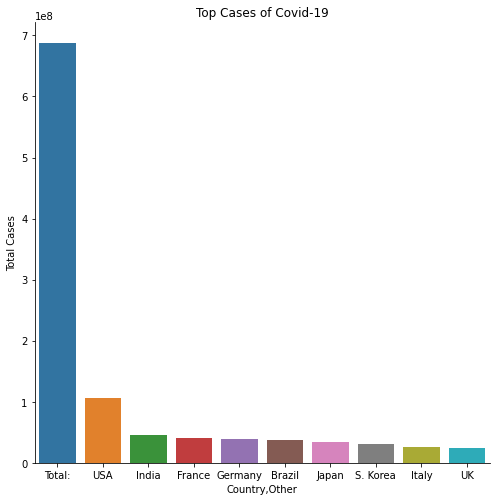

In [40]:

top = data.sort_values("Total Cases", ascending=False).head(10)
sns.catplot(x='Country,Other'
            ,y = 'Total Cases'
            ,data = top
            ,kind="bar"
            ,height=7
           )

plt.title("Top Cases of Covid-19")

plt.show()

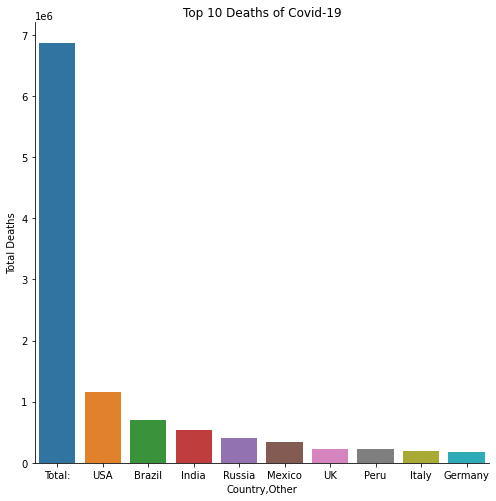

In [45]:
top_cases = data.sort_values('Total Deaths', ascending=False).head(10)
sns.catplot(data=top_cases,
            x='Country,Other',
            y='Total Deaths',
            kind='bar',
            height=7)
plt.title("Top 10 Deaths of Covid-19")
plt.show()

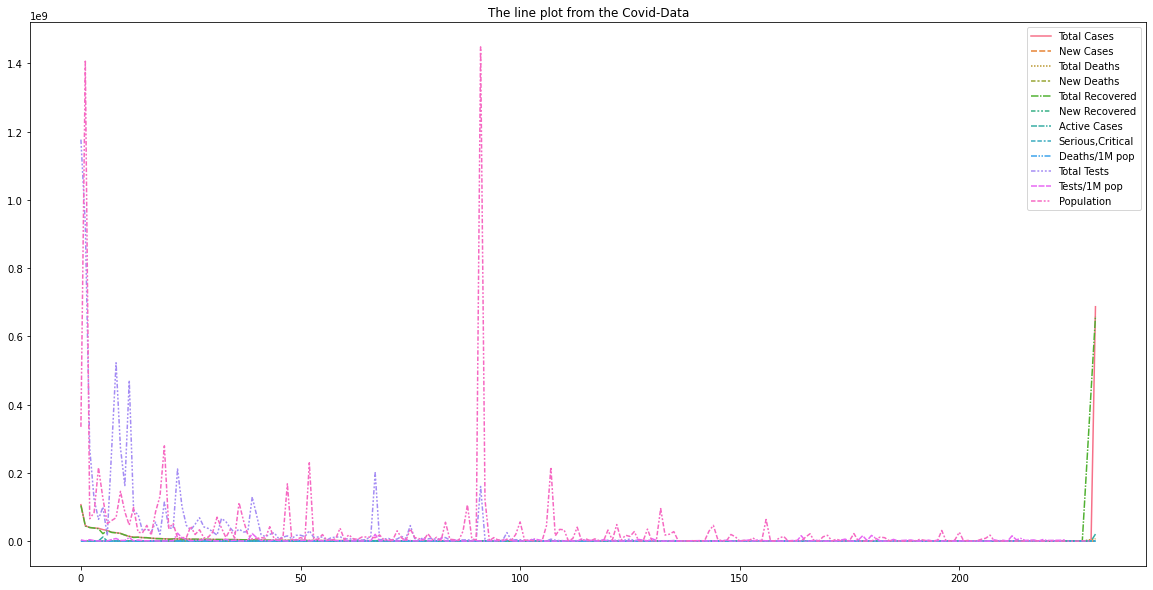

In [43]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data)
plt.title("The line plot from the Covid-Data")
plt.show()

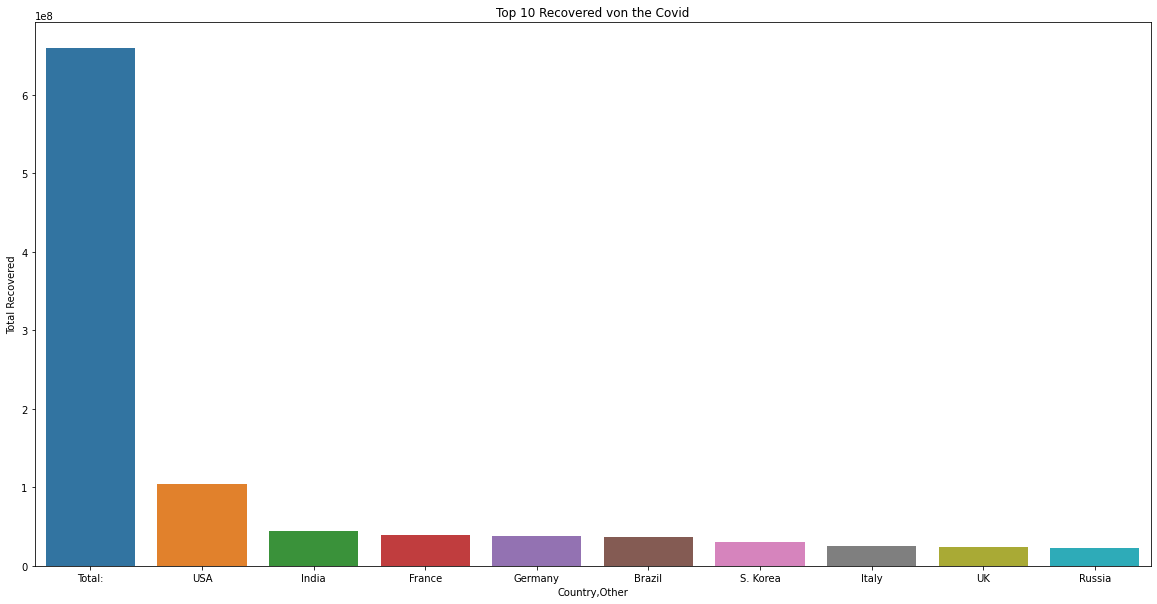

In [51]:
plt.figure(figsize=(20, 10))
recovered = data.sort_values('Total Recovered',ascending=False).head(10)
sns.barplot(data=recovered,x='Country,Other',y='Total Recovered')
plt.title("Top 10 Recovered von the Covid")
plt.show()

In [58]:
data.corr()

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Deaths/1M pop,Total Tests,Tests/1M pop,Population
Total Cases,1.000000,0.649135,0.994118,NaN,0.999858,0.860459,0.874766,0.989380,0.026609,0.840746,0.053790,0.373972
New Cases,0.649135,1.000000,0.618061,NaN,0.615616,1.000000,0.589311,0.583801,0.700057,0.056773,0.020509,-0.164166
Total Deaths,0.994118,0.618061,1.000000,NaN,0.994467,0.841123,0.853667,0.990051,0.046469,0.797509,-0.001363,0.410094
New Deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total Recovered,0.999858,0.615616,0.994467,NaN,1.000000,0.860955,0.866480,0.989434,0.028893,0.847855,0.067046,0.371249
New Recovered,0.860459,1.000000,0.841123,NaN,0.860955,1.000000,0.849136,0.843555,-0.427439,0.019395,-0.032808,0.318453
Active Cases,0.874766,0.589311,0.853667,NaN,0.866480,0.849136,1.000000,0.863693,-0.021872,0.099293,-0.030183,0.070294
"Serious,Critical",0.989380,0.583801,0.990051,NaN,0.989434,0.843555,0.863693,1.000000,-0.030744,0.711447,-0.010246,0.527300
Deaths/1M pop,0.026609,0.700057,0.046469,NaN,0.028893,-0.427439,-0.021872,-0.030744,1.000000,0.167852,0.234710,-0.077579
Total Tests,0.840746,0.056773,0.797509,NaN,0.847855,0.019395,0.099293,0.711447,0.167852,1.000000,0.203881,0.540210


In [63]:
sns.heatmap?

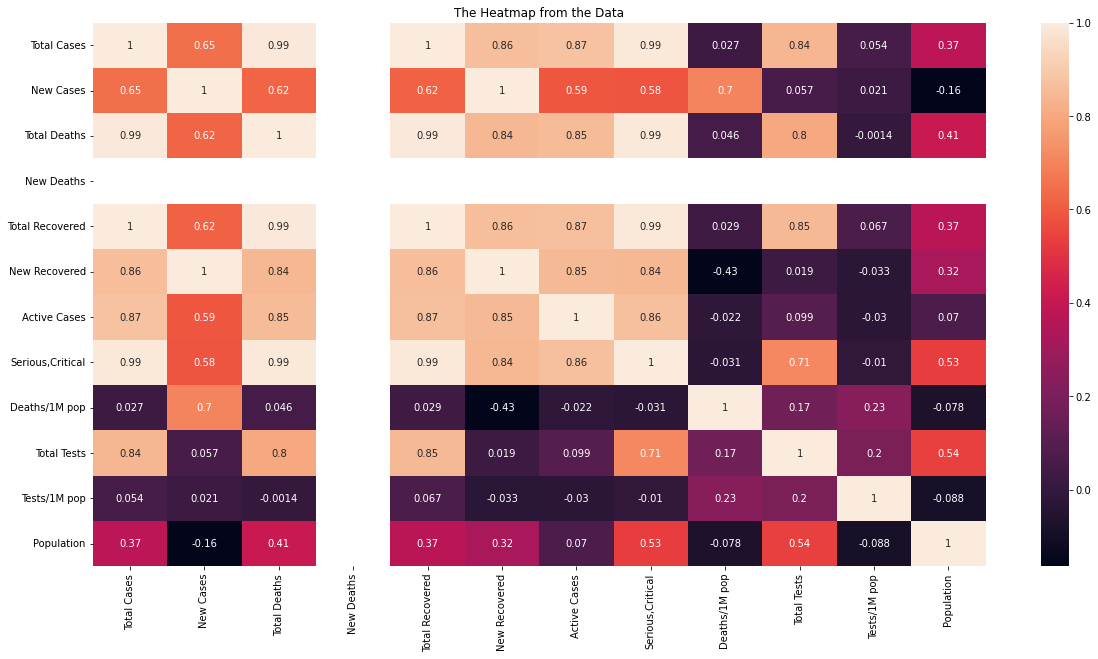

In [66]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, robust=True)
plt.title("The Heatmap from the Data")
plt.show()

In [75]:
data.head(50)

,"Country,Other",Total Cases,New Cases,Total Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,106627427.0,NaN,1159824.0,104549551.0,NaN,918052.0,1368.0,318476,3464.0,1.176835e+09,3514983.0,3.348053e+08
1,India,44939515.0,NaN,531508.0,44356693.0,NaN,51314.0,NaN,31948,378.0,9.264966e+08,658663.0,1.406632e+09
2,France,39980570.0,NaN,166556.0,39677000.0,NaN,137014.0,869.0,609604,2540.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38403667.0,NaN,173044.0,38192900.0,600.0,37723.0,NaN,457821,2063.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,37449418.0,NaN,701494.0,36249161.0,NaN,498763.0,NaN,173897,3257.0,6.377617e+07,296146.0,2.153536e+08
5,Japan,33700970.0,NaN,74501.0,21725273.0,NaN,11901196.0,46.0,268352,593.0,9.998409e+07,796148.0,1.255848e+08
6,S. Korea,31157272.0,14411.0,34474.0,30896033.0,12433.0,226765.0,141.0,607000,672.0,1.580406e+07,307892.0,5.132990e+07
7,Italy,25788387.0,NaN,189738.0,25468617.0,NaN,130032.0,100.0,427932,3149.0,2.714492e+08,4504425.0,6.026277e+07
8,UK,24555629.0,NaN,221943.0,24310623.0,2324.0,23063.0,NaN,358487,3240.0,5.225265e+08,7628357.0,6.849791e+07
9,Russia,22839878.0,NaN,398239.0,22236983.0,NaN,204656.0,NaN,156646,2731.0,2.734000e+08,1875095.0,1.458059e+08


In [76]:
Data_corr = data.drop("New Cases", axis=1)
Data_corr.head()

,"Country,Other",Total Cases,Total Deaths,Total Recovered,New Recovered,Active Cases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,106627427.0,1159824.0,104549551.0,NaN,918052.0,1368.0,318476,3464.0,1.176835e+09,3514983.0,3.348053e+08
1,India,44939515.0,531508.0,44356693.0,NaN,51314.0,NaN,31948,378.0,9.264966e+08,658663.0,1.406632e+09
2,France,39980570.0,166556.0,39677000.0,NaN,137014.0,869.0,609604,2540.0,2.714902e+08,4139547.0,6.558452e+07
3,Germany,38403667.0,173044.0,38192900.0,600.0,37723.0,NaN,457821,2063.0,1.223324e+08,1458359.0,8.388360e+07
4,Brazil,37449418.0,701494.0,36249161.0,NaN,498763.0,NaN,173897,3257.0,6.377617e+07,296146.0,2.153536e+08


In [79]:
DataCorr=Data_corr.corr()

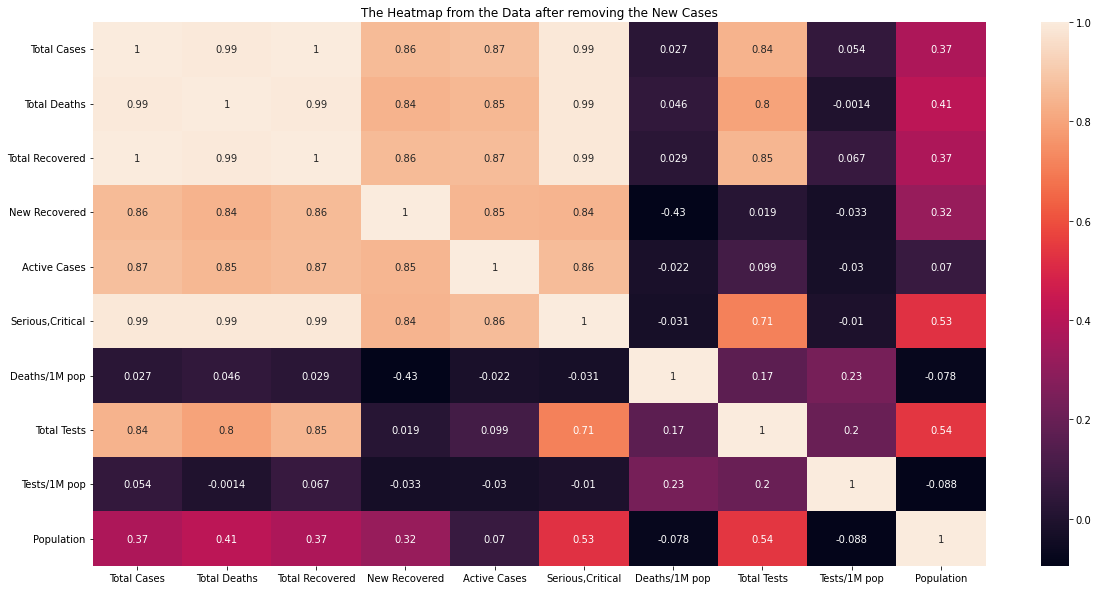

In [84]:
plt.figure(figsize=(20, 10))
sns.heatmap(DataCorr, annot=True, robust=True)
plt.title("The Heatmap from the Data after removing the New Cases")
plt.show()